
# How to Create a Simple Animation

In this tutorial, we will create a simple animation from a series of `matplotlib` figures. We will use `imageio` package to convert the images to a gif (or a video). 

We will use `IPython.display` to load and display the gif in this notebook. This step is optional. 

First, let's import the libraries that we need.

In [1]:
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image

We are going to create a simple figure with a big text to indicate the frame number as shown in the example below.

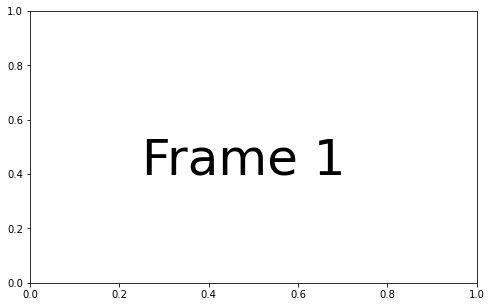

In [2]:
plt.figure(figsize=(8,5));
plt.text(0.25, 0.4, "Frame 1", fontsize=50);

The main steps to create the animation are:
1. Create an empty placeholder to store the images (a list object).
1. Iteratively perform the following:
    1.  Create the `matplotlib` figure and save it.
    1.  Load the figure and append it to the placeholder.
1. Save the placeholder that contains the images inot a `.gif` file using `imageio.mimsave()`.

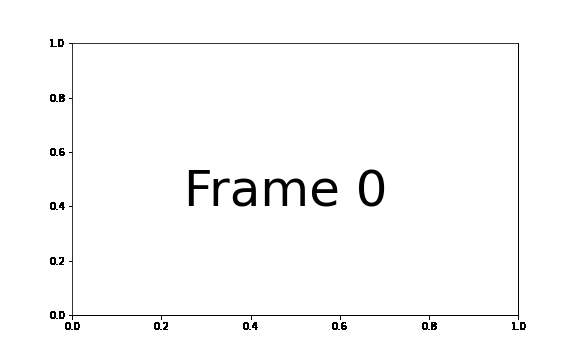

In [3]:
# create an empty list called "images"
images = []

# perform iteration to generate a figure for each frame
for i in range(10):
    
    # give the file name for the figure
    file_name = 'plot_' + str(i) + '.png'
    
    # draw and save your figures
    plt.figure(figsize=(8,5));
    plt.text(0.25, 0.4, "Frame " + str(i), fontsize=50);
    plt.savefig(file_name)
    plt.close() # supress the images from displaying here.
    
    # read and append the newly saved figure into the "images" list
    images.append(imageio.imread(file_name))

# save the images as a gif       
imageio.mimsave('simple_animation.gif', images)

# Optional load and show in the notebook
Image('simple_animation.gif')

You can check in your working folder that there should be a file called `simple_animation.gif`.

In some instances, the .gif file can become too big. Its size can be reduced further by using `pygifsicle` library (you may need to install it using `pip install pygifsicle`):


```python
from pygifsicle import optimize
optimize('simple_animation.gif')
```

Another point to note that there are probably too many figures that have been generated and saved into your working folder. If you want to delete them quickly, you can find them using their file names (here we filter the files that start with `plot_`) and delete them using `os.remove`.

In [4]:
import glob, os

# fine the files that were used to create the gif
files = glob.glob("plot_*.png")

# delete all the files
for file in files:
    os.remove(file) 